<a href="https://colab.research.google.com/github/alawoderidwan24/new-portfolio/blob/main/HEART__DISEASE__PREDICTOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from google.colab import files
files.upload()

{}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [4]:
!pip install kaggle

In [5]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# **Data Preparation**


In [36]:
df=pd.read_csv('/content/drive/MyDrive/heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [8]:
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [9]:
df.dtypes

,0
id,int64
age,int64
sex,object
dataset,object
cp,object
trestbps,float64
chol,float64
fbs,object
restecg,object
thalch,float64


In [10]:
columns_num=df.select_dtypes(include=['number']).columns

In [11]:
columns_num

Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num'], dtype='object')

In [12]:
df[columns_num]. describe()


,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [13]:
df[columns_num]=df[columns_num].fillna(df[columns_num].mean())

In [14]:
df[columns_num].isnull().sum()

,0
id,0
age,0
trestbps,0
chol,0
thalch,0
oldpeak,0
ca,0
num,0


In [15]:
df.tail()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
915,916,54,Female,VA Long Beach,asymptomatic,127.000000,333.0,True,st-t abnormality,154.000000,False,0.000000,NaN,0.676375,NaN,1
916,917,62,Male,VA Long Beach,typical angina,132.132404,139.0,False,st-t abnormality,137.545665,NaN,0.878788,NaN,0.676375,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.000000,223.0,True,st-t abnormality,100.000000,False,0.000000,NaN,0.676375,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,132.132404,385.0,True,lv hypertrophy,137.545665,NaN,0.878788,NaN,0.676375,NaN,0
919,920,62,Male,VA Long Beach,atypical angina,120.000000,254.0,False,lv hypertrophy,93.000000,True,0.000000,NaN,0.676375,NaN,1


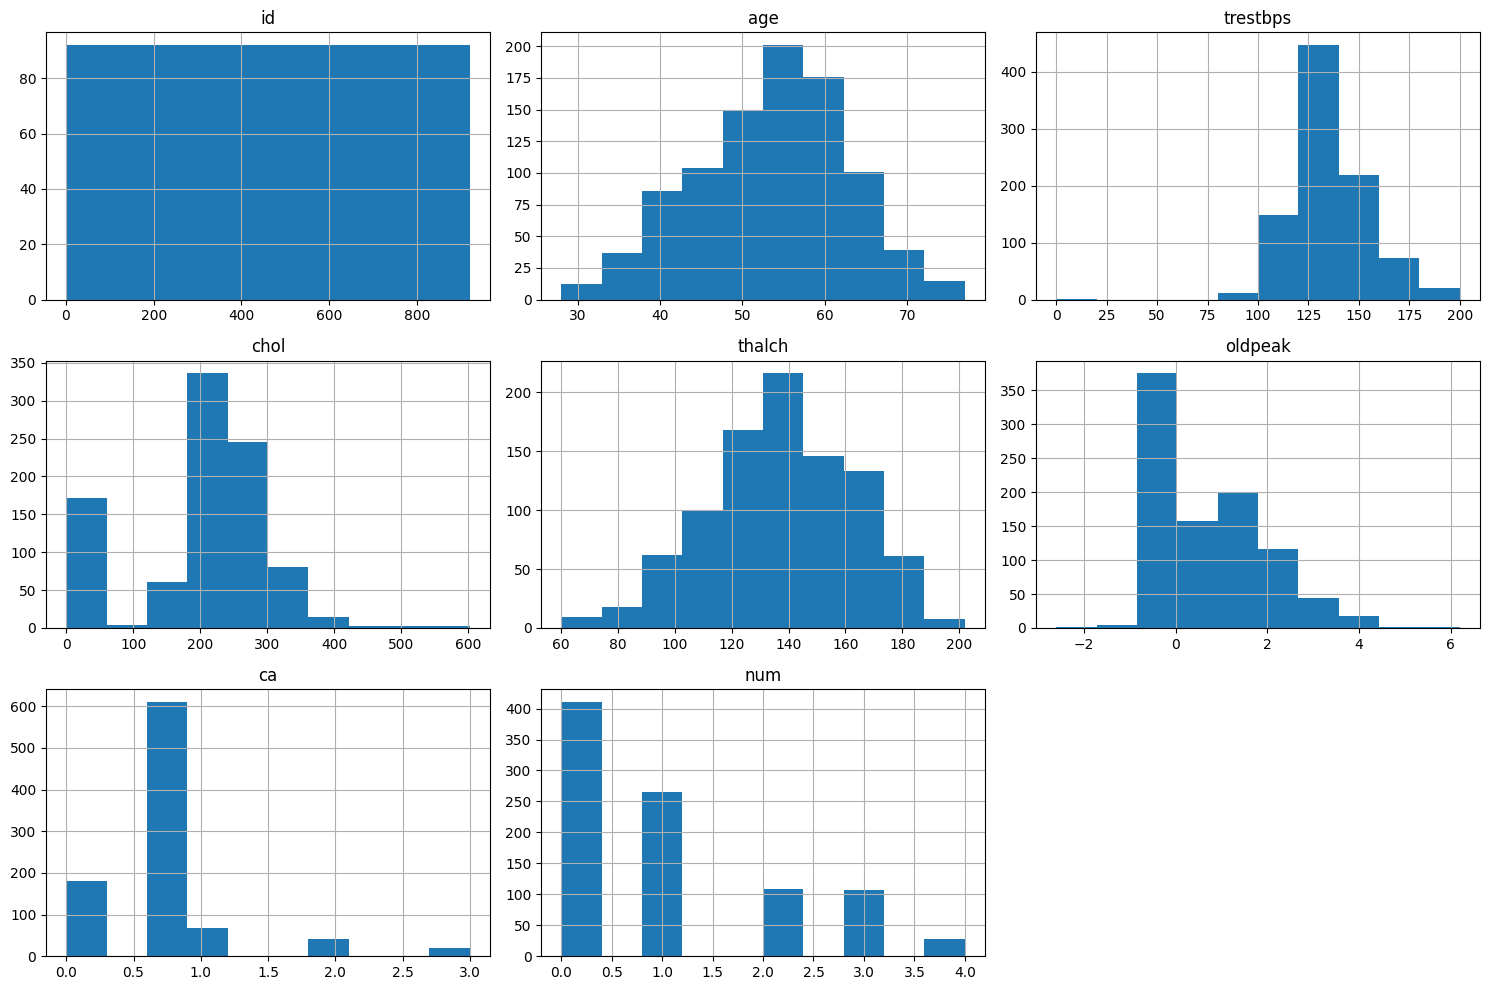

In [16]:
df[columns_num].hist(figsize=(15,10))
plt.tight_layout()
plt.show()

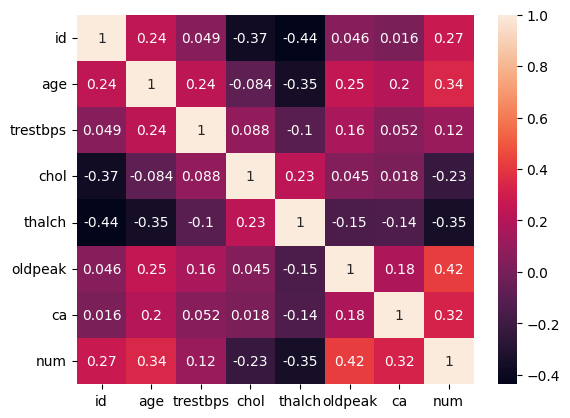

In [17]:
sns.heatmap(df[columns_num].corr(),annot=True)
plt.show()

In [18]:
cat_cols=df.select_dtypes(include='object').columns.tolist()
if 'num' in cat_cols:
  cat_cols.remove('num')

In [19]:
X=df.drop('num', axis=1)
y=(df['num']>0).astype(int)

In [20]:
X=pd.get_dummies(X,columns=cat_cols)
print("Final feature columns:" ,X.columns)

Final feature columns: Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca',
       'sex_Female', 'sex_Male', 'dataset_Cleveland', 'dataset_Hungary',
       'dataset_Switzerland', 'dataset_VA Long Beach', 'cp_asymptomatic',
       'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina',
       'fbs_False', 'fbs_True', 'restecg_lv hypertrophy', 'restecg_normal',
       'restecg_st-t abnormality', 'exang_False', 'exang_True',
       'slope_downsloping', 'slope_flat', 'slope_upsloping',
       'thal_fixed defect', 'thal_normal', 'thal_reversable defect'],
      dtype='object')


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [22]:
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
model=LogisticRegression()
model.fit(X_train_scaled,y_train)

LogisticRegression()

In [26]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [27]:
y_pred=model.predict(X_test_scaled)
print("Accuracy:",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy: 0.842391304347826
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        75
           1       0.88      0.85      0.87       109

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184

[[62 13]
 [16 93]]


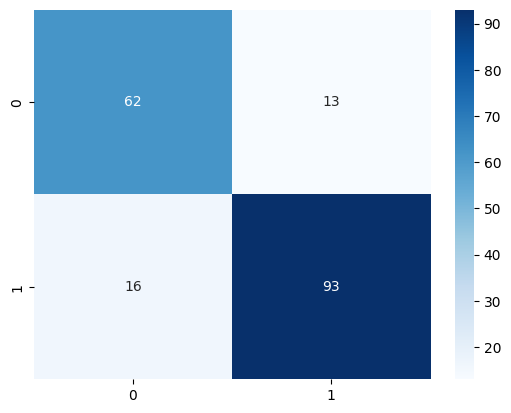

In [28]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d",cmap="Blues")
plt.show()

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rf_model=RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(X_train_scaled,y_train)
y_pred_rf=rf_model.predict(X_test_scaled)
print("Accuracy of the randomforest model:", accuracy_score(y_test,y_pred_rf))


Accuracy of the randomforest model: 0.8858695652173914


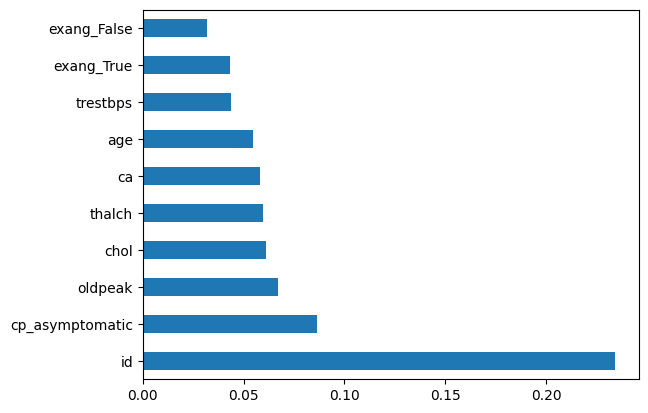

In [31]:
feat_imp=pd.Series(rf_model.feature_importances_,index=X.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.show()

In [32]:
import joblib
joblib.dump(rf_model,"heart_rf_model.pkl")
joblib.dump(scaler,"heart_scaler.pkl")

['heart_scaler.pkl']

# **NOW LET MAKE PREDICTIONS**

In [37]:
from google.colab import files
files.upload()

Saving heart_dataset.csv to heart_dataset.csv


{'heart_dataset.csv': b'age,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina\n58,130,220,1,normal,150,False,1.4,flat,0,fixed defect,0,1,0,0,0,1\n67,160,276,0,lv hypertrophy,108,True,1.5,flat,3,normal,0,1,1,0,0,0\n42,120,230,0,normal,170,False,1.0,upsloping,0,reversable defect,1,0,0,0,1,0\n50,130,210,0,lv hypertrophy,158,False,0.8,flat,0,normal,0,1,0,0,1,0\n45,114,230,0,normal,165,False,1.1,downsloping,0,normal,1,0,0,1,0,0\n'}

In [39]:
import joblib
import pandas as np

new_df=pd.read_csv("heart_dataset.csv")

In [41]:
# Get column lists from training dataframe
numeric_cols = df.select_dtypes(include='number').columns.tolist()
cat_cols = df.select_dtypes(include='object').columns.tolist()
bool_cols = df.select_dtypes(include='bool').columns.tolist()

# Drop columns not in new_df to avoid errors
numeric_cols = [col for col in numeric_cols if col in new_df.columns]
cat_cols = [col for col in cat_cols if col in new_df.columns]
bool_cols = [col for col in bool_cols if col in new_df.columns]

# Fill missing values in numeric columns with training set mean
new_df[numeric_cols] = new_df[numeric_cols].fillna(df[numeric_cols].mean())

# Fill missing values in categorical columns with 'Unknown'
for col in cat_cols:
    new_df[col] = new_df[col].fillna('Unknown')

# Convert boolean columns to int
for col in bool_cols:
    new_df[col] = new_df[col].astype(int)

# One-hot encode categorical columns
new_df_encoded = pd.get_dummies(new_df, columns=cat_cols)

# Align columns with training features X.columns
new_df_encoded = new_df_encoded.reindex(columns=X.columns, fill_value=0)

# Scale data
scaler = joblib.load('heart_scaler.pkl')
user_scaled = scaler.transform(new_df_encoded)

# Predict
model = joblib.load('heart_rf_model.pkl')
preds = model.predict(user_scaled)
new_df['Heart_Disease_Prediction'] = preds

print(new_df)

   age  trestbps  chol  fbs         restecg  thalch  exang  oldpeak  \
0   58       130   220    1          normal     150  False      1.4   
1   67       160   276    0  lv hypertrophy     108   True      1.5   
2   42       120   230    0          normal     170  False      1.0   
3   50       130   210    0  lv hypertrophy     158  False      0.8   
4   45       114   230    0          normal     165  False      1.1   

         slope  ca               thal  sex_Female  sex_Male  cp_asymptomatic  \
0         flat   0       fixed defect           0         1                0   
1         flat   3             normal           0         1                1   
2    upsloping   0  reversable defect           1         0                0   
3         flat   0             normal           0         1                0   
4  downsloping   0             normal           1         0                0   

   cp_atypical angina  cp_non-anginal  cp_typical angina  \
0                   0           

# **In the heart_disease_prediction, 0 indicates that the person does not have heart disease, while 1 indicates that the person does.**